# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as prepro
import time
from sklearn import linear_model

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [36]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [37]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]
y=y.reshape(y.shape[0],1)
X.shape
y.shape

(97, 1)

Text(0, 0.5, 'Bénéfice x1000')

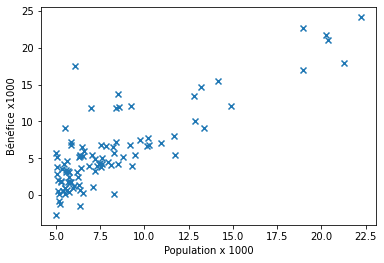

In [38]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [39]:
def computeCostNonVect(X, y, theta, type):
    start_time = time.time()
    s=0
    for i in range (len(X)):
        h=theta[0]+theta[1]*X[i][1]-y[i][0] #on calcule le cout J avec la fonction h - y
        s+=pow(h,2) #on calcule cette somme ²
    cout=s/(2*len(X)) # on multiplie par 1/2m, m etant la taille du dataset X
    end_time = time.time()
    if type==1:
        return cout, end_time-start_time 
    else : 
        return cout       

In [40]:
def computeCost(X, y, theta,type):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    start_time = time.time()
    gradients = X.dot(theta)- y #la fonction h - y
    gradients= pow(gradients,2)
    cout=np.sum(gradients)/(2*len(X)) #la fonction J est 1/2m * somme 
    end_time = time.time()
    if(type==1):
        return cout , end_time-start_time
    else : 
        return cout   

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [41]:
def gradientDescent(X, y, theta, alpha, iterations):
    #initialization des variables
    t0 = t1 = 0
    Grad0 = Grad1 = 0
    m=len(X) 
    J = []
    t0A = []
    t1A = []
    start_time = time.time()
    #sans vectorization
    for i in range(iterations):
        # calculer la somme de la fonction h - y pour J0
        for j in range(m):
            Grad0 = Grad0 + (theta[0] + theta[1] * X[j][1]) - (y[j][0])
        # calculer la somme de la fonction (h - y) * x pour J1
        for k in range(m):
            Grad1 = Grad1 + ((theta[0] + theta[1] * X[k][1]) - (y[k][0])) * X[k][1]
        #on calcule avec J0 et J1 la descente du gradient 
        t0 = theta[0] - (alpha * (1/m) * Grad0)
        t1 = theta[1] - (alpha * (1/m) * Grad1)
        theta[0] = t0
        theta[1] = t1
        t0A.append(t0)
        t1A.append(t1)
        
        J.append(computeCost(X,y,theta,0))
        #reinitializer pour calculer le prochain
        Grad0 = Grad1 = 0
    #Print the model parameters.    
    print('model parameters:',theta,sep = '\n')
    # Print Time Take for Gradient Descent to Run.
    print('Time Taken For Gradient Descent in Sec:',time.time()- start_time)
    # Prediction on the same training set.
    h = []
    for i in range(m):
        h.append(theta[0] + theta[1] * X[i][1])
    #Reshape de theta0
    t0P=np.array(t0A)
    t0P.reshape(1,len(t0A))
    #Reshape de theta1
    t1P=np.array(t1A)
    t1P.reshape(1,len(t1A))
    return theta,t0P,t1P,h,J

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [42]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [43]:
initialCostN,tempsN=computeCostNonVect(X, y, theta,1)
initialCost,temps= computeCost(X,y,theta,1)
if temps<tempsN:
    print("le temps de compute cost avec vectorisation est meilleur")
elif temps>tempsN:
    print("le temps de compute cost sans vectorisation est meilleur")
else :
    print("le temps de compute cost avec vectorisation et sans vectrisation sont les mêmes")

le temps de compute cost avec vectorisation est meilleur


Appel des la fonction de calcul du gradient

In [44]:
alpha=0.01
iterations=1500
theta,t0P,t1P,h,J = gradientDescent(X, y, theta, alpha, iterations)

model parameters:
[[-3.63029144]
 [ 1.16636235]]
Time Taken For Gradient Descent in Sec: 3.6081082820892334


In [45]:
t1P[0]

array([0.6532885])

model parameters:
[[-3.89460265]
 [ 1.19291528]]
Time Taken For Gradient Descent in Sec: 3.4975433349609375


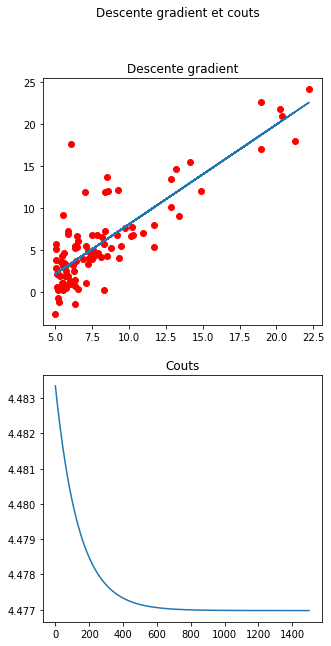

In [46]:
# paramètres
iterations = 1500
alpha = 0.02
# Appel
theta,t0P,t1P,h,J = gradientDescent(X, y, theta, alpha, iterations)
fig, axs = plt.subplots(2,figsize=(5,10))
fig.suptitle('Descente gradient et couts')
axs[0].set_title('Descente gradient')
axs[0].plot(X[:,1],h)
axs[0].scatter(X[:,1],y[:,0],c = 'red')
axs[1].set_title('Couts')
axs[1].plot(range(iterations), J)


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

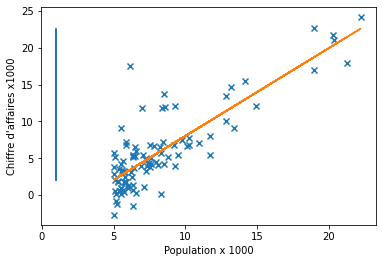

In [47]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

model parameters:
[[-3.89570219]
 [ 1.19302574]]
Time Taken For Gradient Descent in Sec: 4.047399520874023
A :  (400, 400)
B :  (400, 400)
loss :  (400, 400)


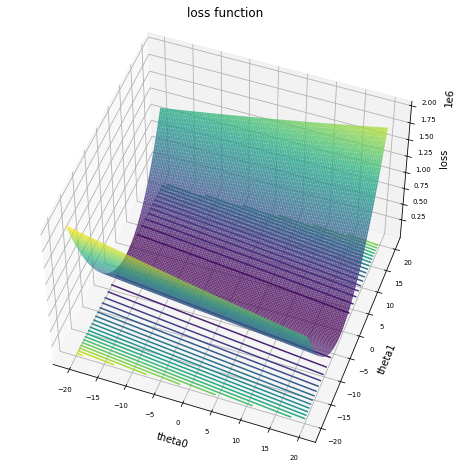

In [48]:
alpha=0.01
iterations=1500
theta,t0P,t1P,h,J = gradientDescent(X, y, theta, alpha, iterations)
a = b = np.arange(-20, 20, 0.1)
A, B = np.meshgrid(a, b)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection="3d")
zs = np.array([computeCost(X,y,[a,b],0) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)
print("A : ",A.shape)
print("B : ",B.shape)
print("loss : ",loss.shape)
ax.plot_surface(A, B, loss, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss, 20, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(50, 290)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('loss',rotation="vertical")
ax.set_title('loss function')
plt.tick_params(axis='both', which='major', labelsize=7)

Prédire des valeurs de y

In [49]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.27988789])

In [50]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.45547798])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [51]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [52]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
XMulti=np.column_stack((intercept,dataMulti[:,0]))
XMulti=np.column_stack((XMulti,dataMulti[:,1]))
yMulti = dataMulti[:, 2]
yMulti = yMulti.reshape(yMulti.shape[0],1)
print(yMulti.shape)
print(XMulti.shape)

(47, 1)
(47, 3)


Text(0, 0.5, "Chiffre d'affaires x1000")

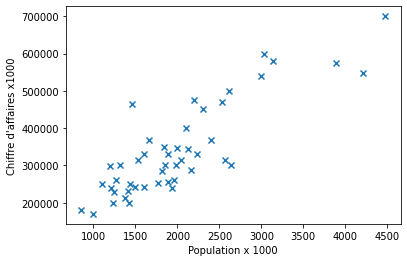

In [53]:
plt.scatter(XMulti[:,1],yMulti,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')

In [54]:
nbTheta = XMulti.shape[1]
thetaMulti = np.zeros((nbTheta, 1))
thetaMulti.shape

(3, 1)

In [55]:
# redéfinissez vos fonctions de coût si cela est necessaire
def computeCostNonVectMulti(X, y, theta,type):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    start_time = time.time()
    s=0
    for i in range (len(X)):
        h = 0
        for j in range(X.shape[1]):
            h = h + theta[j]*X[i][j]
        h=h-y[i][0] #on calcule le cout J avec la fonction h - y
        s+=pow(h,2) #on calcule cette somme ²
    cout=s/(2*len(X)) # on multiplie par 1/2m, m etant la taille du dataset X
    print("sans vectorisation : ",cout)
    end_time = time.time()
    print("temps : ",end_time-start_time)
    if type==1:
        return cout,end_time-start_time
    else :
        return cout
            
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement    

def computeCostVectMulti(X, y, theta, type):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    start_time = time.time()
    gradients = X.dot(theta)- y #la fonction h - y
    gradients= pow(gradients,2)
    cout=np.sum(gradients)/(2*len(X)) #la fonction J est 1/2m * somme 
    #print("avec vectorisation :" ,cout)
    end_time = time.time()
    #print("temps : ",end_time-start_time)
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    if type==1:
        return cout,end_time-start_time
    else :
        return cout

In [56]:
coutVec,temps=computeCostVectMulti(XMulti,yMulti, thetaMulti,1)
cout,tempsN=computeCostNonVectMulti(XMulti,yMulti, thetaMulti,1)
difference = coutVec-cout
print("La difference entre le cout avec vectorisation et sans vectorisation ",difference)
if temps<tempsN:
    print("le temps de compute cost avec vectorisation est meilleur")
elif temps>tempsN:
    print("le temps de compute cost sans vectorisation est meilleur")
else :
    print("le temps de compute cost avec vectorisation et sans vectrisation sont les mêmes")

sans vectorisation :  [6.55915857e+10]
temps :  0.002991914749145508
La difference entre le cout avec vectorisation et sans vectorisation  [0.]
le temps de compute cost avec vectorisation est meilleur


Mise à l'échelle des données

In [57]:
#données normalisées
normalized_X = prepro.normalize(XMulti, axis=0)
normalized_y = prepro.normalize(yMulti, axis=0)

169900.0
699900.0
(47, 1)


Text(0, 0.5, "Chiffre d'affaires x1000")

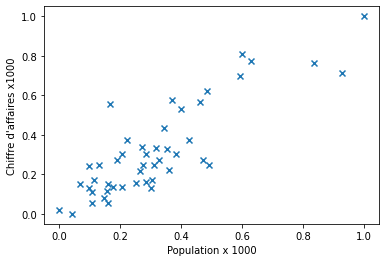

In [58]:
#données scaled avec la formule : (donnée - min)/(max-min)
mins = []
max = []
mins.append(XMulti[0][1])
mins.append(XMulti[0][2])
max.append(XMulti[0][1])
max.append(XMulti[0][2])

for element in XMulti:
    if(mins[0] > element[1]):
        mins[0] = element[1]
    if(mins[1] > element[2]):
        mins[1] = element[2]
for element in XMulti:
    if(max[0] < element[1]):
        max[0] = element[1]
    if(max[1] < element[2]):
        max[1] = element[2]

ScaledX = np.array([0,0,0])
vals = np.array([])
np.append(ScaledX, [0,0])
for elem in XMulti:
    val1 = (elem[1]-mins[0])/(max[0]-mins[0])
    val2 = (elem[2]-mins[1])/(max[1]-mins[1])
    vals = np.append(vals,np.array([1,val1,val2]))
    ScaledX = np.vstack((ScaledX, vals))
    vals = np.array([])
ScaledX = np.delete(ScaledX,0,0)

ymin = np.min(yMulti)
ymax = np.max(yMulti)
print(ymin)
print(ymax)
ScaledY = np.array([0])
print(yMulti.shape)
for element in yMulti:
    val = (element - ymin)/(ymax-ymin)
    ScaledY = np.vstack((ScaledY,val))
ScaledY = np.delete(ScaledY,0,0)
plt.scatter(ScaledX[:,1],ScaledY,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')


Normalisation des données en moyenne = 0

Text(0, 0.5, "Chiffre d'affaires x1000")

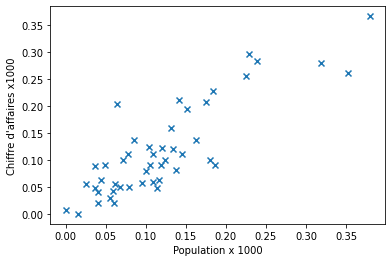

In [59]:
XNormalized = prepro.normalize(ScaledX, axis = 0)
yNormalized = prepro.normalize(ScaledY, axis = 0)
plt.scatter(XNormalized[:,1],yNormalized,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')

Appliquer la descente du gradient à plusieurs variables

In [60]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    #initialization des variables
    Grad = []
    m=len(X) 
    J = []
    thetas = []
    start_time = time.time()
    for i in range(iterations):
        # calculer la somme de la fonction h - y pour J0
        for j in range(m):
            hypo = X.dot(theta) - y
            jx = X.T.dot(hypo)
            for l in range(X.shape[1]):
               Grad.append(X[j][l]*(jx[l]))
        #on calcule avec J0 et J1 la descente du gradient 
        for k in range(X.shape[1]):
            theta[k] = theta[k] -(alpha *(1/m) * Grad[k])
        J.append(computeCostVectMulti(X,y,theta,0))
        thetas.append(np.array(theta))
        #reinitializer pour calculer le prochain
        Grad = []
    # Get Time Take for Gradient Descent to Run.
    execut_time=time.time()- start_time
    # Prediction on the same training set.
    h = []
    for a in range(m):
        h.append(theta[0] + theta[1] * X[a][1]+ theta[2] * X[a][2])
    #Reshape pour le plot
    Hp=np.array(h)
    Hp.reshape(1,len(h))
    return theta,Hp,J,execut_time

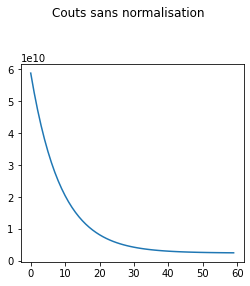

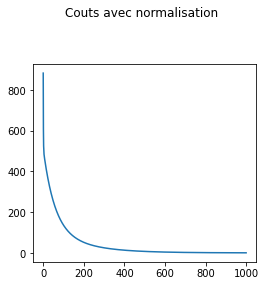

In [61]:
# paramètres
iterations = 1000
iter = 60
alpha = 0.4
alpha2 = 0.0000000002
# Appel
#Plot without scaled parameters
thetaMult,hmulti,J,execut_time = gradientDescentMulti(XMulti,yMulti,thetaMulti,alpha2,iter)
fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(2, 1, 1)
fig.suptitle('Couts sans normalisation')    
ax.plot(range(iter), J)   
#Plot with scaled parameters
thetaMul,hmul,J,execut_time = gradientDescentMulti(ScaledX, ScaledY, thetaMulti, alpha, iterations)
fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(2, 1, 1)
fig.suptitle('Couts avec normalisation')    
ax.plot(range(iterations), J)


In [62]:
predict1 = np.matmul([1,2500, 3],thetaMulti)
predict1

array([13134.66902201])

In [63]:
predict2 = np.matmul([1,2500, 3],thetaMul)
predict2

array([13134.66902201])

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [64]:
# paramètres
iterations = 1000
iter = 60
alpha = 0.4
alpha2 = 0.0000000002
# Appel
#Plot without scaled parameters
theta = np.zeros((nbTheta, 1))
thetaMult,hmulti,JMulti,execut_timeMulti = gradientDescentMulti(XMulti,yMulti,thetaMulti,alpha2,iter)
thetaMul,hmul,JMul,execut_timeMul = gradientDescentMulti(ScaledX, ScaledY, thetaMulti, alpha, iter)
theta,hmul1,JMul1,execut_timeMul1=gradientDescentMulti(normalized_X, normalized_y, theta, alpha, iter)
#comparaison du temps
if((execut_timeMulti-execut_timeMul)<0):
    print("Le temps d'execution avec les données scaled est mieux")
elif((execut_timeMulti-execut_timeMul)>0):
    print("Le temps d'execution avec les données non scaled est mieux")
else :
    print("Le temps d'execution avec les données scaled ou non scaled est le meme")
#comparaison de la dscente
JMulti.sort()
JMul.sort()
if((np.subtract(JMulti,JMulti).sum())<0):
    print("La descente du gradient avec les données scaled est mieux")
elif((np.subtract(JMulti,JMul).sum())>0):
    print("La descente du gradient avec les données non scaled est mieux")
else :
    print("La descente du gradient avec les données scaled ou non scaled est le meme")
#comparaison des thetas
thetaMult.sort()
thetaMul.sort()
if(((thetaMult-thetaMul).sum())<0):
    print("Les thetas avec les données scaled sont meilleurs")
elif(((thetaMult-thetaMul).sum())>0):
    print("Les thetas avec les données non scaled sont meilleurs")
else :
    print("Les thetas avec les données scaled ou non scaled sont les memes")
#comparaison de l'hypothese
hmulti.sort()
hmul.sort()
if((np.subtract(hmulti,hmul).sum())<0):
    print("L'hypothese avec les données scaled est mieux")
elif((np.subtract(hmulti,hmul).sum())>0):
    print("L'hypothese avec les données non scaled est mieux")
else :
    print("L'hypothese avec les données scaled ou non scaled est le meme")

Le temps d'execution avec les données non scaled est mieux
La descente du gradient avec les données non scaled est mieux
Les thetas avec les données scaled ou non scaled sont les memes
L'hypothese avec les données non scaled est mieux


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [65]:
model = linear_model.LinearRegression()
model.fit(ScaledX, ScaledY)
model_param=model.coef_[0]
print('Les thetas du model \ntheta0:',model_param[0], 'theta1 :',model_param[1],'theta2 :',model_param[1] )
print('Loss with Scikitlearn functions =', computeCostVectMulti(ScaledX, ScaledY, model.coef_.reshape(3, 1),0)) 
print("Loss with our algorithmes : ",computeCostVectMulti(ScaledX, ScaledY,theta,0))

Les thetas du model 
theta0: 0.0 theta1 : 0.9524108702681852 theta2 : 0.9524108702681852
Loss with Scikitlearn functions = 0.008830165272521435
Loss with our algorithmes :  0.044782647195739454


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [66]:
# bonne chance